This notebook shows how to apply input level information bottleneck to
a pretrained VGG16. Before running this notebook, please make sure that:

1. All the required packages are installed

2. A small subset of Imagenet is downloaded and linked to
`path/to/InputIBA/data/imagenet`. A pre-processed ImageNet
(containing images and bounding boxes) can be downloaded from
[this link](https://drive.google.com/file/d/1LBKQ4BR3zepfnQAKCumkABHYjXBanBBL/view?usp=sharing)

In [1]:
import matplotlib.pyplot as plt
import cv2
from input_iba.models import build_attributor
from input_iba.datasets import build_dataset, build_pipeline
import torch
from torch.utils.data import DataLoader
import mmcv
import os

Change current working directory to `path/to/InputIBA`. Modify
this if necessary.

In [2]:
os.chdir('..')
print(f'Current working directory: {os.getcwd()}')
cfg = mmcv.Config.fromfile('configs/vgg_imagenet.py')
device = 'cuda:0'

Estimate the distribution for the information bottleneck at feature map level.
This will take a while.

In [3]:
est_set = build_dataset(cfg.data['estimation'])
est_loader = DataLoader(est_set, **cfg.data['data_loader'])
attributor = build_attributor(cfg.attributor, default_args=dict(device=device))
attributor.estimate(est_loader, cfg.estimation_cfg)

Train the attributor on a sample image

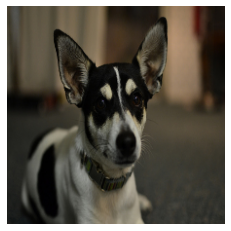

In [4]:
attr_set = build_dataset(cfg.data['attribution'])
sample = attr_set[15]
input_tensor = sample['input']
input_name = sample['input_name']
target = sample['target']
img_path = os.path.join(attr_set.img_root,
                        attr_set.ind_to_dir[target],
                        input_name + '.JPEG')
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.imshow(cv2.resize(img, dsize=(224, 224)))
plt.axis('off')
plt.show()

In [5]:
input_tensor = input_tensor.to(device)

attributor.make_attribution(input_tensor,
                            target,
                            attribution_cfg=cfg.attribution_cfg)

Show the attribution map from IB at feature map level (feature IBA).

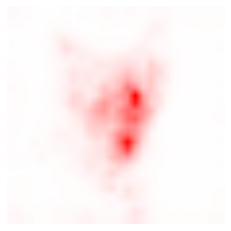

In [6]:
attributor.show_feat_mask(out_file=None, show=True)

Show the attribution map from IB at input level (input IBA).

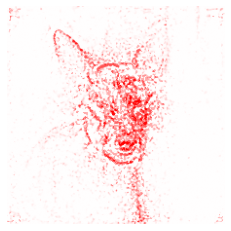

In [7]:
attributor.show_input_mask(out_file=None, show=True)

